<a href="https://colab.research.google.com/github/luiseduaardo/NeuroPrev/blob/main/an%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#rodar no collab
!git clone https://github.com/luiseduaardo/NeuroPrev.git
%cd NeuroPrev

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('dataset/healthcare-dataset-stroke-data.csv')

In [3]:
print("Dataset carregado com sucesso!")
df.head()

Dataset carregado com sucesso!


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_ty

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df_analise = df.drop('id', axis=1) #remove coluna id


In [6]:
target_counts = df["stroke"].value_counts()
target_pct = df["stroke"].value_counts(normalize=True) * 100

print(target_counts)
print(target_pct)

stroke
0    4861
1     249
Name: count, dtype: int64
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


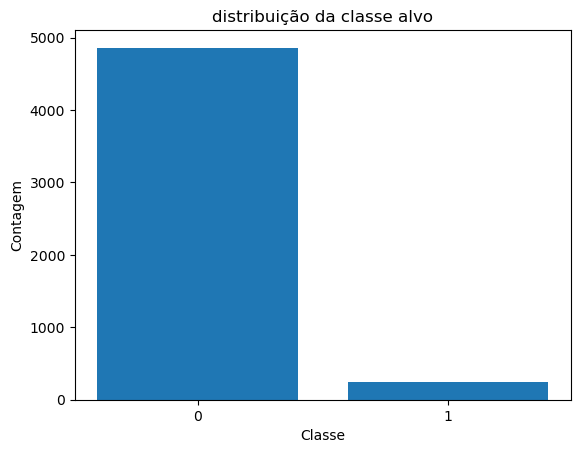

In [ ]:
plt.figure()
plt.bar(target_counts.index.astype(str), target_counts.values)
plt.title("distribuição da classe alvo")
plt.xlabel("Stroke")
plt.ylabel("Contagem")
plt.show()

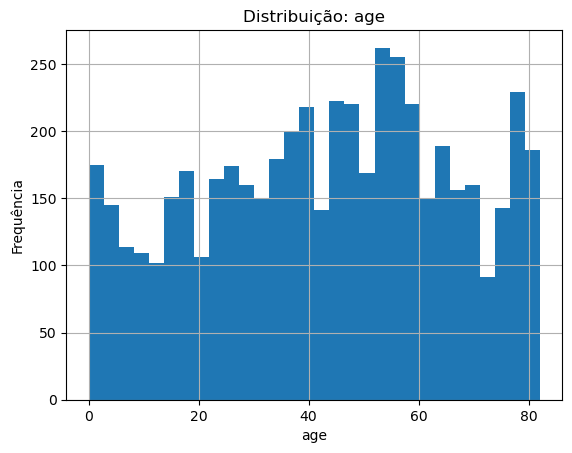

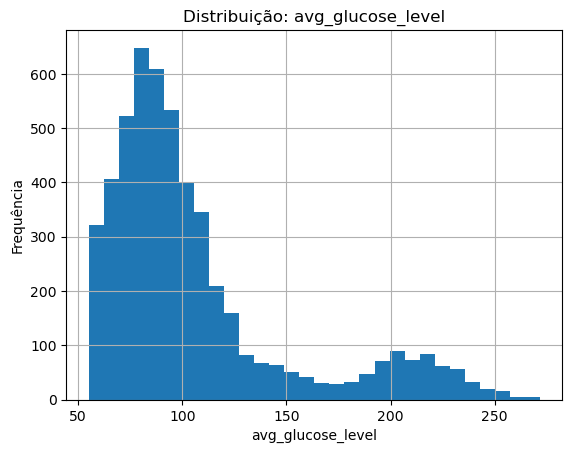

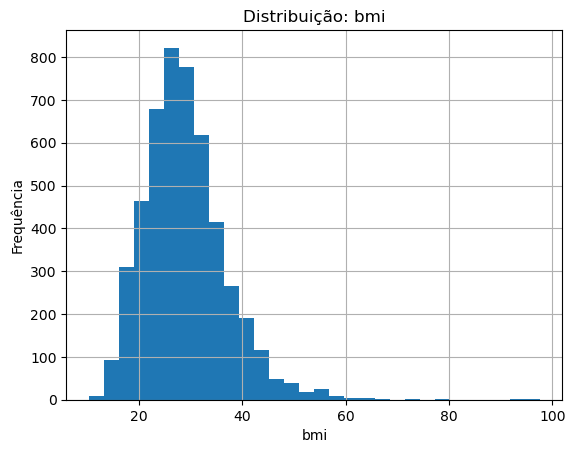

In [12]:
#histograma das variaveis numericas
num_cols = ["age", "avg_glucose_level", "bmi"]

for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribuição: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()


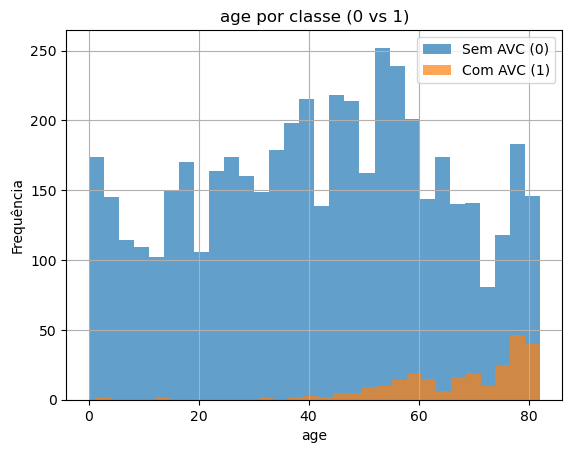

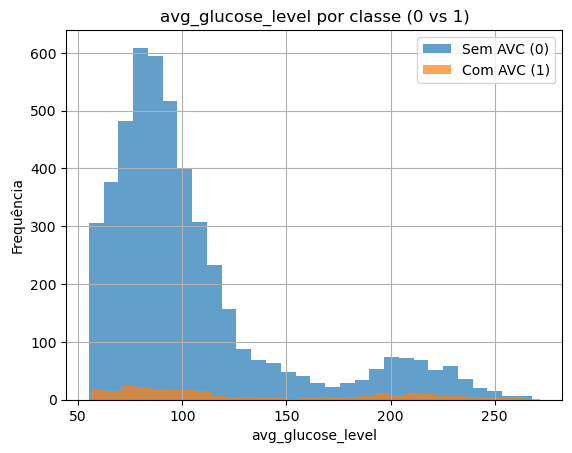

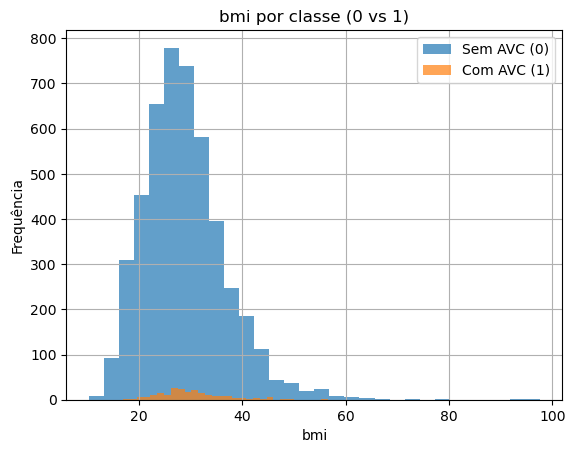

In [ ]:
#distribuicao de derrame por variavel numerica

for col in num_cols:
    plt.figure()
    df[df["stroke"] == 0][col].hist(bins=30, alpha=0.7)
    df[df["stroke"] == 1][col].hist(bins=30, alpha=0.7)
    plt.title(f"{col} por classe (0 vs 1)")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.legend(["Sem AVC (0)", "Com AVC (1)"])
    plt.show()

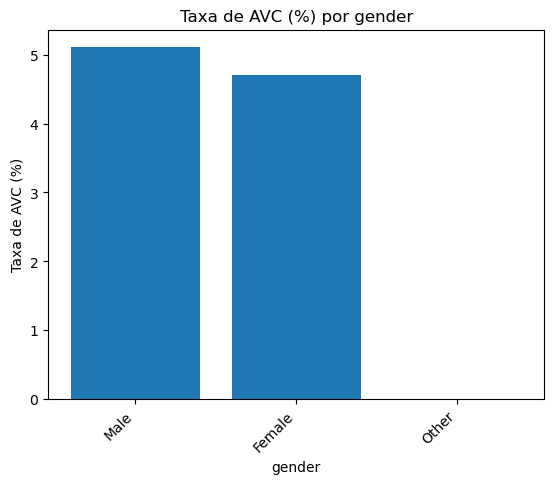

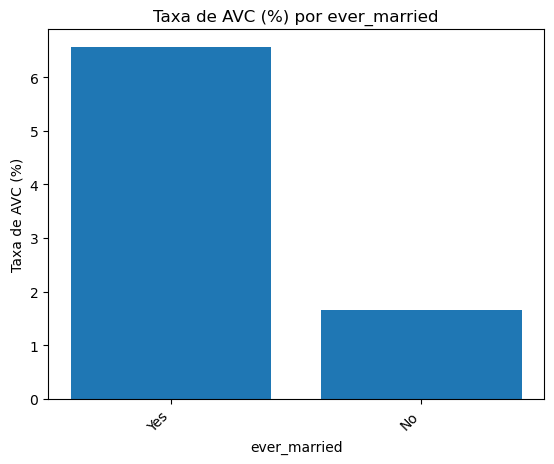

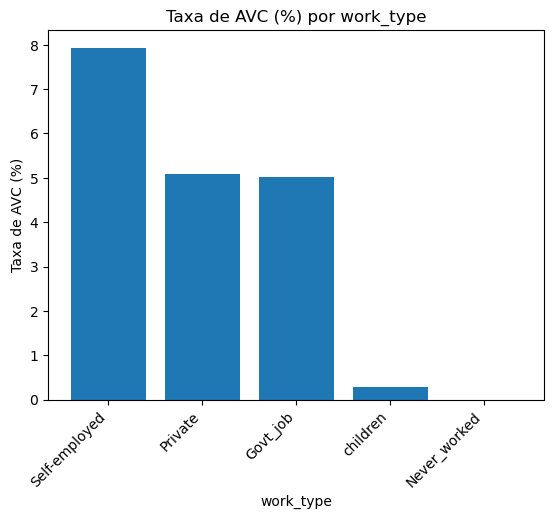

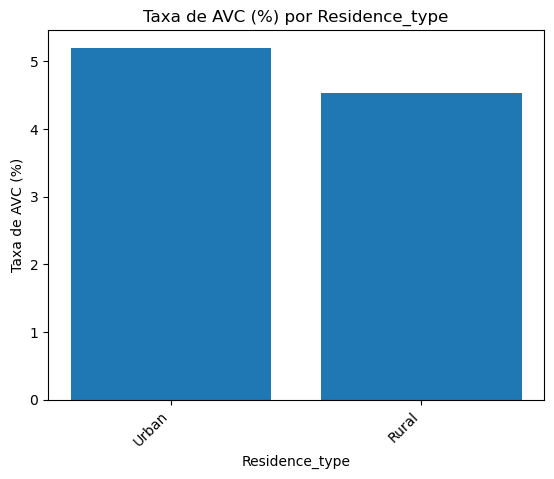

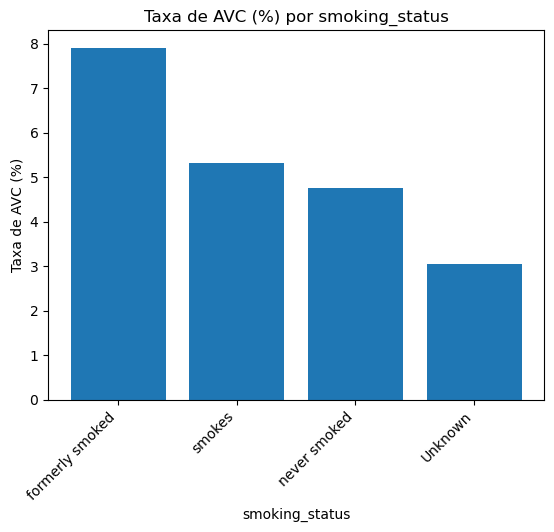

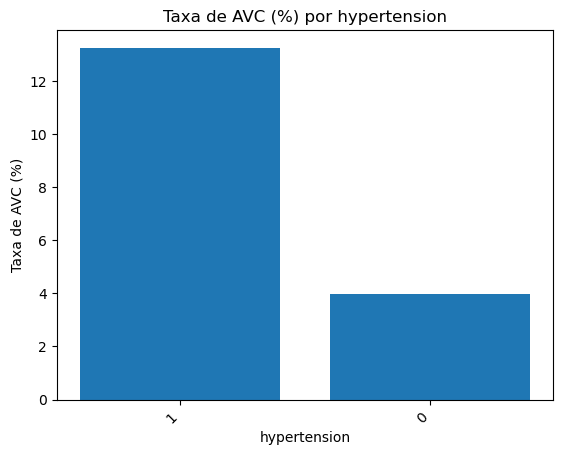

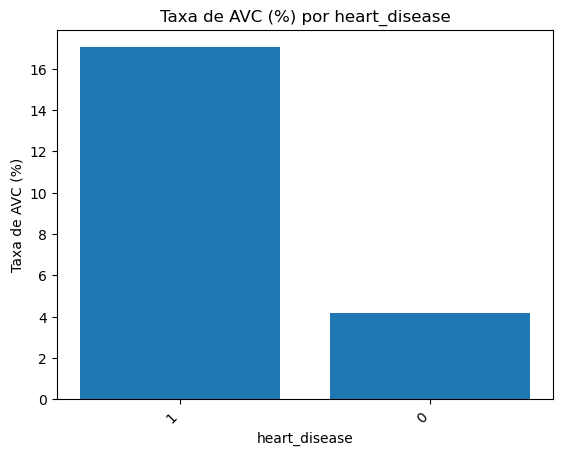

In [ ]:
#distribuicao de stroke por variavel categorica
cat_cols = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease"]

for col in cat_cols:
    rate = df.groupby(col)["stroke"].mean().sort_values(ascending=False) * 100
    
    plt.figure()
    plt.bar(rate.index.astype(str), rate.values)
    plt.title(f"Taxa de AVC (%) por {col}")
    plt.xlabel(col)
    plt.ylabel("Taxa de AVC (%)")
    plt.xticks(rotation=45, ha="right")
    plt.show()

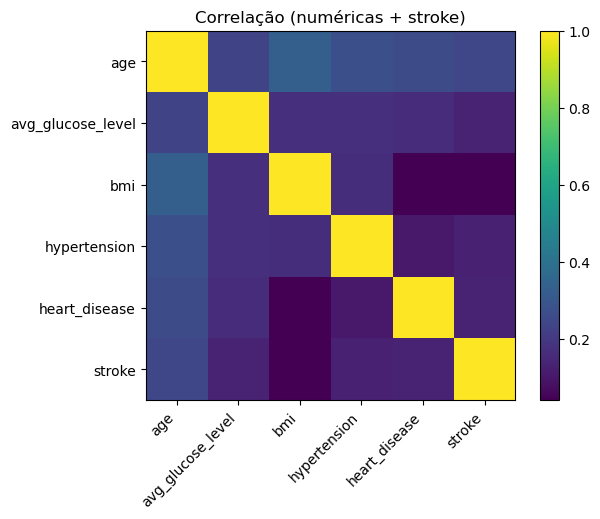

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
Name: stroke, dtype: float64

In [15]:
#correlacao de variaveis numericas
corr = df[["age", "avg_glucose_level", "bmi", "hypertension", "heart_disease", "stroke"]].corr()

plt.figure()
plt.imshow(corr)
plt.title("Correlação (numéricas + stroke)")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.show()

corr["stroke"].sort_values(ascending=False)